In [3]:
import cv2

# Resizes a image and maintains aspect ratio
def maintain_aspect_ratio_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # Grab the image size and initialize dimensions
    dim = None
    (h, w) = image.shape[:2]

    # Return original image if no need to resize
    if width is None and height is None:
        return image

    # We are resizing height if width is none
    if width is None:
        # Calculate the ratio of the height and construct the dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # We are resizing width if height is none
    else:
        # Calculate the ratio of the 0idth and construct the dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # Return the resized image
    return cv2.resize(image, dim, interpolation=inter)

In [5]:
def make_square(im, min_size=256, fill_color=(0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def remove_blotches(img):
    # Convert the image to a numpy array and then to grayscale
    image_np = np.array(img)
    gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to smooth out the noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Use adaptive thresholding to isolate the walls
    thresh_image = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2)

    # Define a kernel for dilation
    kernel = np.ones((5,5), np.uint8)
    
    # Apply dilation to the thresholded image
    dilated_image = cv2.dilate(thresh_image, kernel, iterations=1)

    # Display the processed image
    plt.figure(figsize=(10,10))
    plt.imshow(dilated_image, cmap='gray')
    plt.axis('off')  # Hide the axis
    plt.show()

    return dilated_image


In [7]:
def hough_transform(image):
    
    # https://docs.opencv.org/4.x/d6/d10/tutorial_py_houghlines.html
    # PROBABILISTIC HOUGH TRANSFORM
    
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    # lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=1, maxLineGap=1)
    hough_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # Convert to 3-channel image to draw colored lines
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(hough_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        #print(x1, y1, x2, y2)
    return hough_img
    
    '''
    # HOUGH TRANSFORM
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 175)
    hough_img = np.copy(image)  # Create a copy of the original image to draw lines on
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(hough_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return hough_img
    '''

In [14]:
import numpy as np
import imutils
import cv2

# Define the function to check if the contour is 'bad'
def is_contour_bad(c):
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # the contour is 'bad' if it is not a rectangle
    return not len(approx) == 4

# Function to remove bad contours from an image
def remove_bad_contours(image_path, save_path=None):
    # load the image, convert it to grayscale, and find edges in the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edged = cv2.Canny(gray, 50, 100)

    # find contours in the image and initialize the mask that will be used to remove the bad contours
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    mask = np.ones(image.shape[:2], dtype="uint8") * 255

    # loop over the contours
    for c in cnts:
        # if the contour is bad, draw it on the mask
        if is_contour_bad(c):
            cv2.drawContours(mask, [c], -1, 0, -1)

    # remove the contours from the image and show the resulting images
    image = cv2.bitwise_and(image, image, mask=mask)

    # if a save path is provided, write the image to file
    if save_path:
        cv2.imwrite(save_path, image)

    return image

# Example usage:
# result = remove_bad_contours("path_to_image.png", "path_to_save_image.png")
# cv2.imshow("Result", result)
# cv2.waitKey(0)

# result = remove_bad_contours("Images/reassembled_e2_3x3_2.png", "Images/reassembled_e2_3x3_2_nocurves.png")
# cv2.imshow("Result", result)

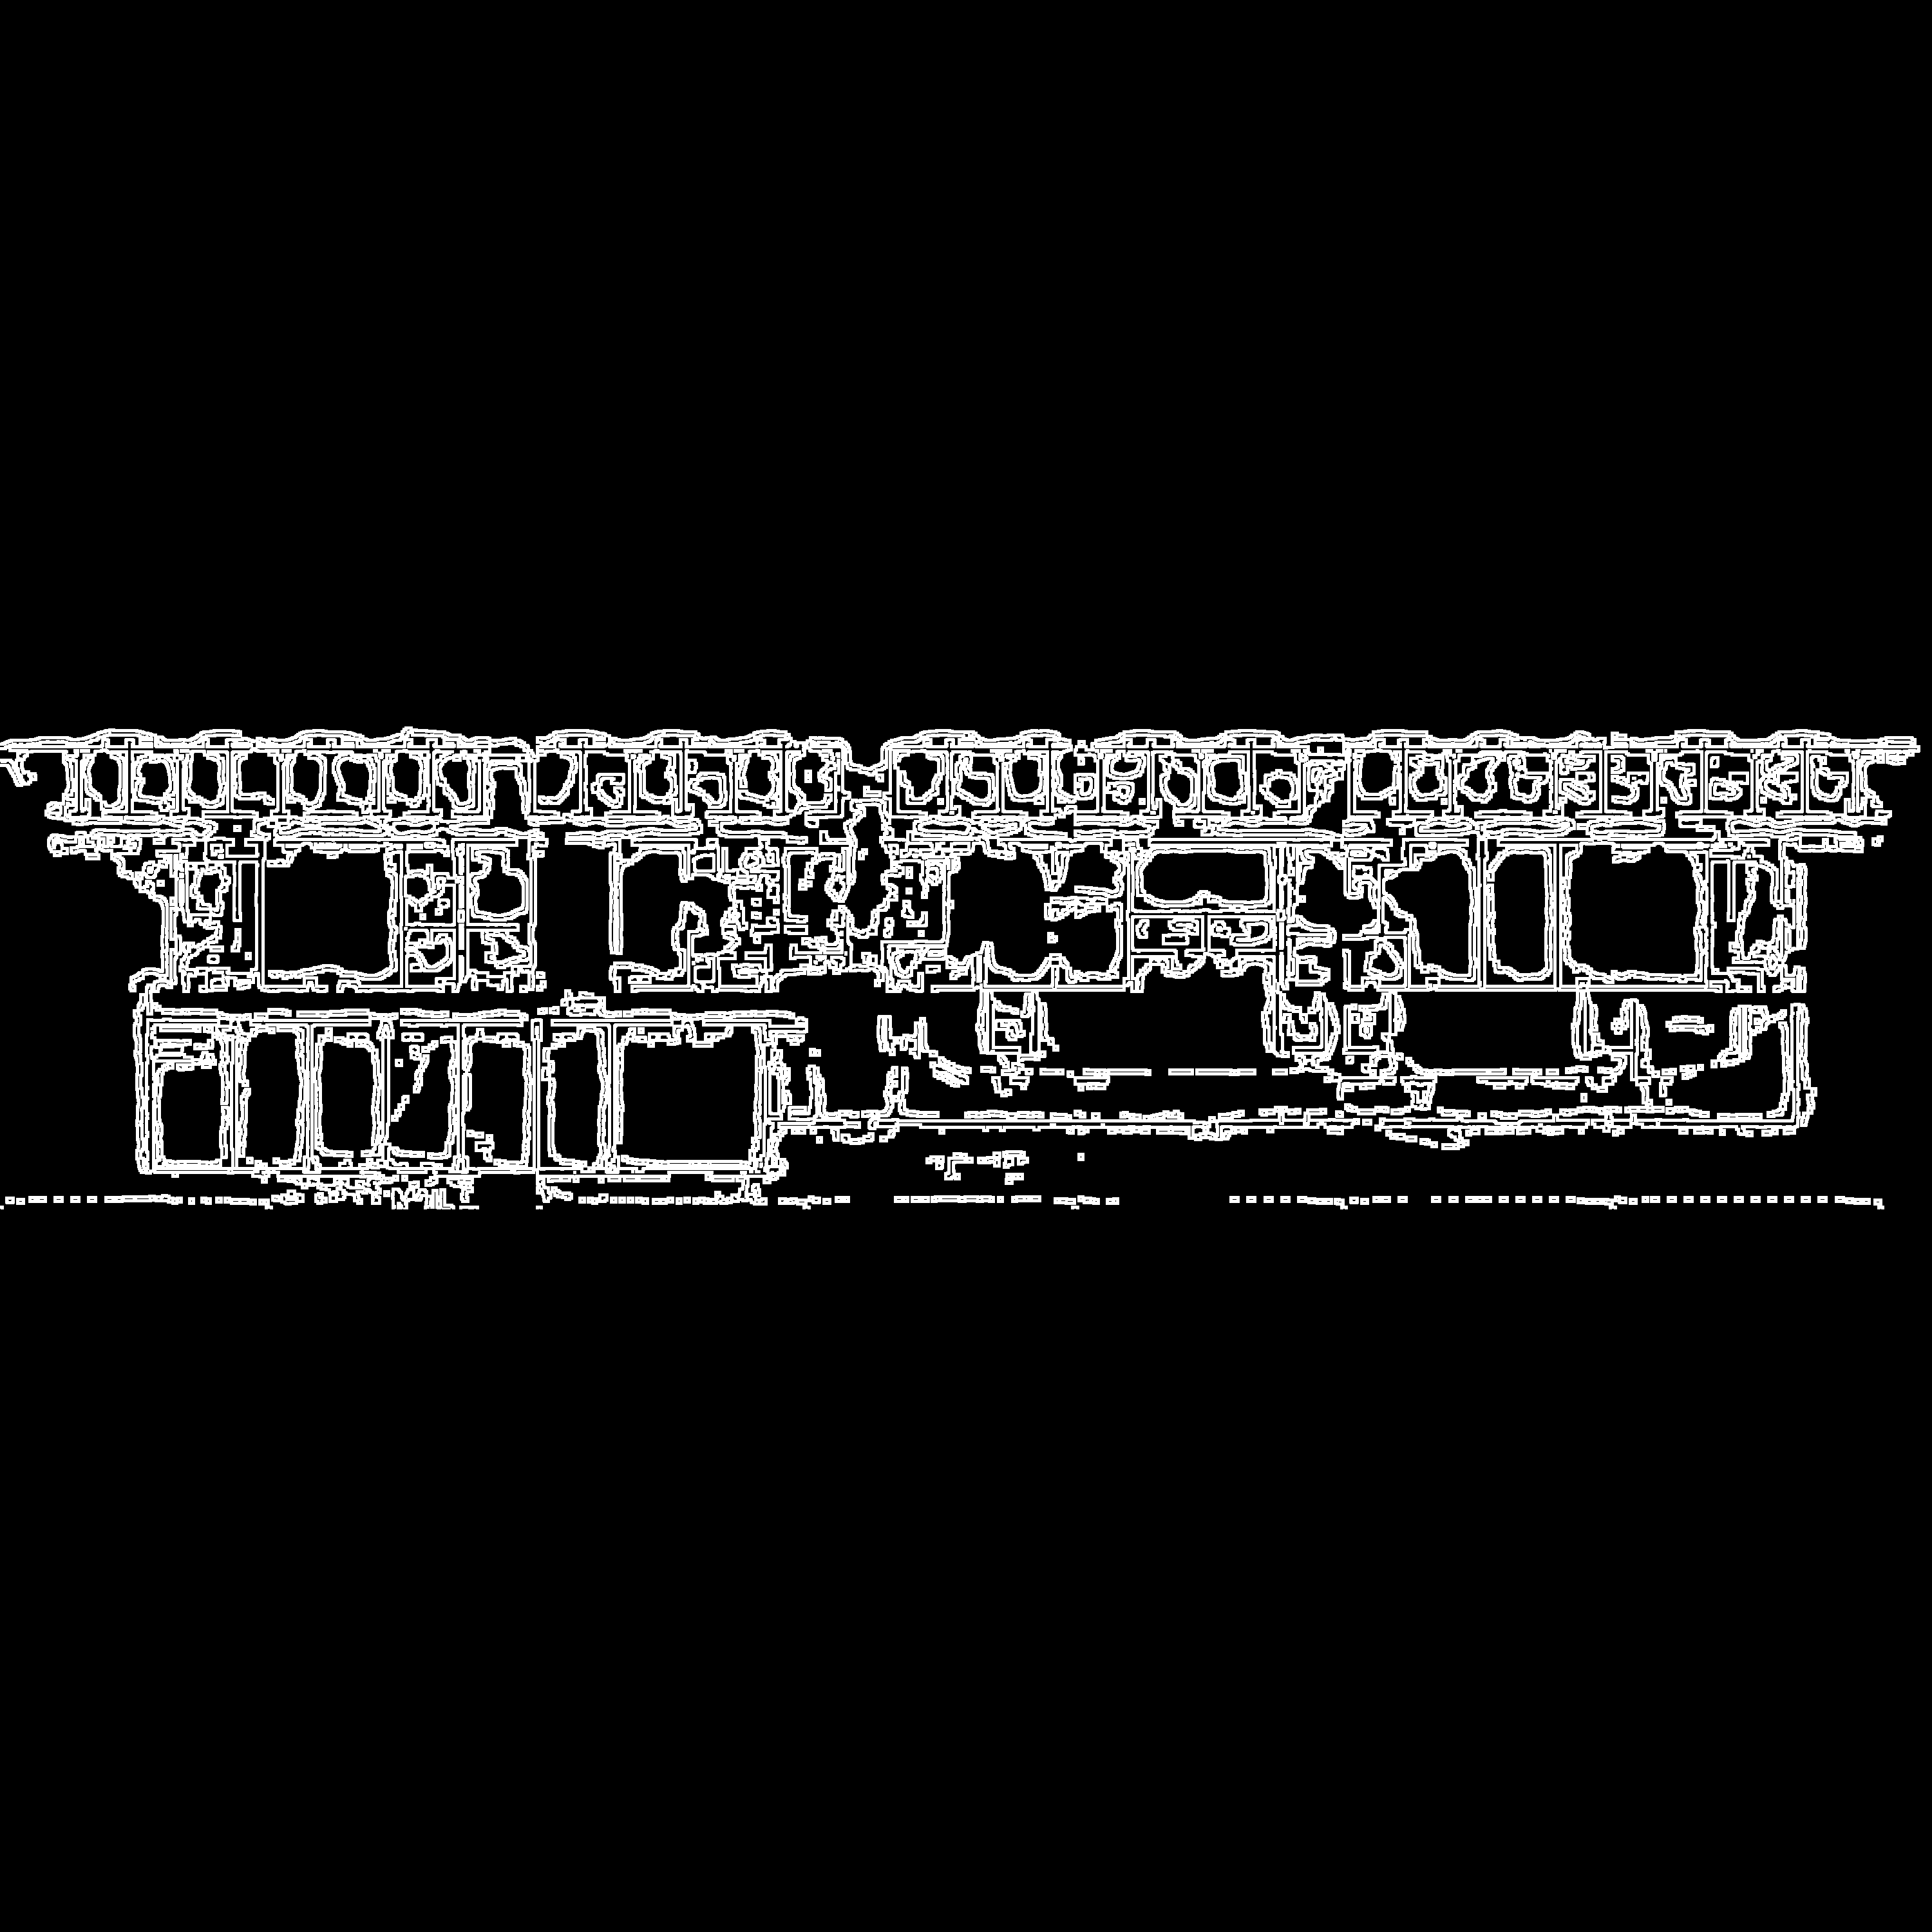

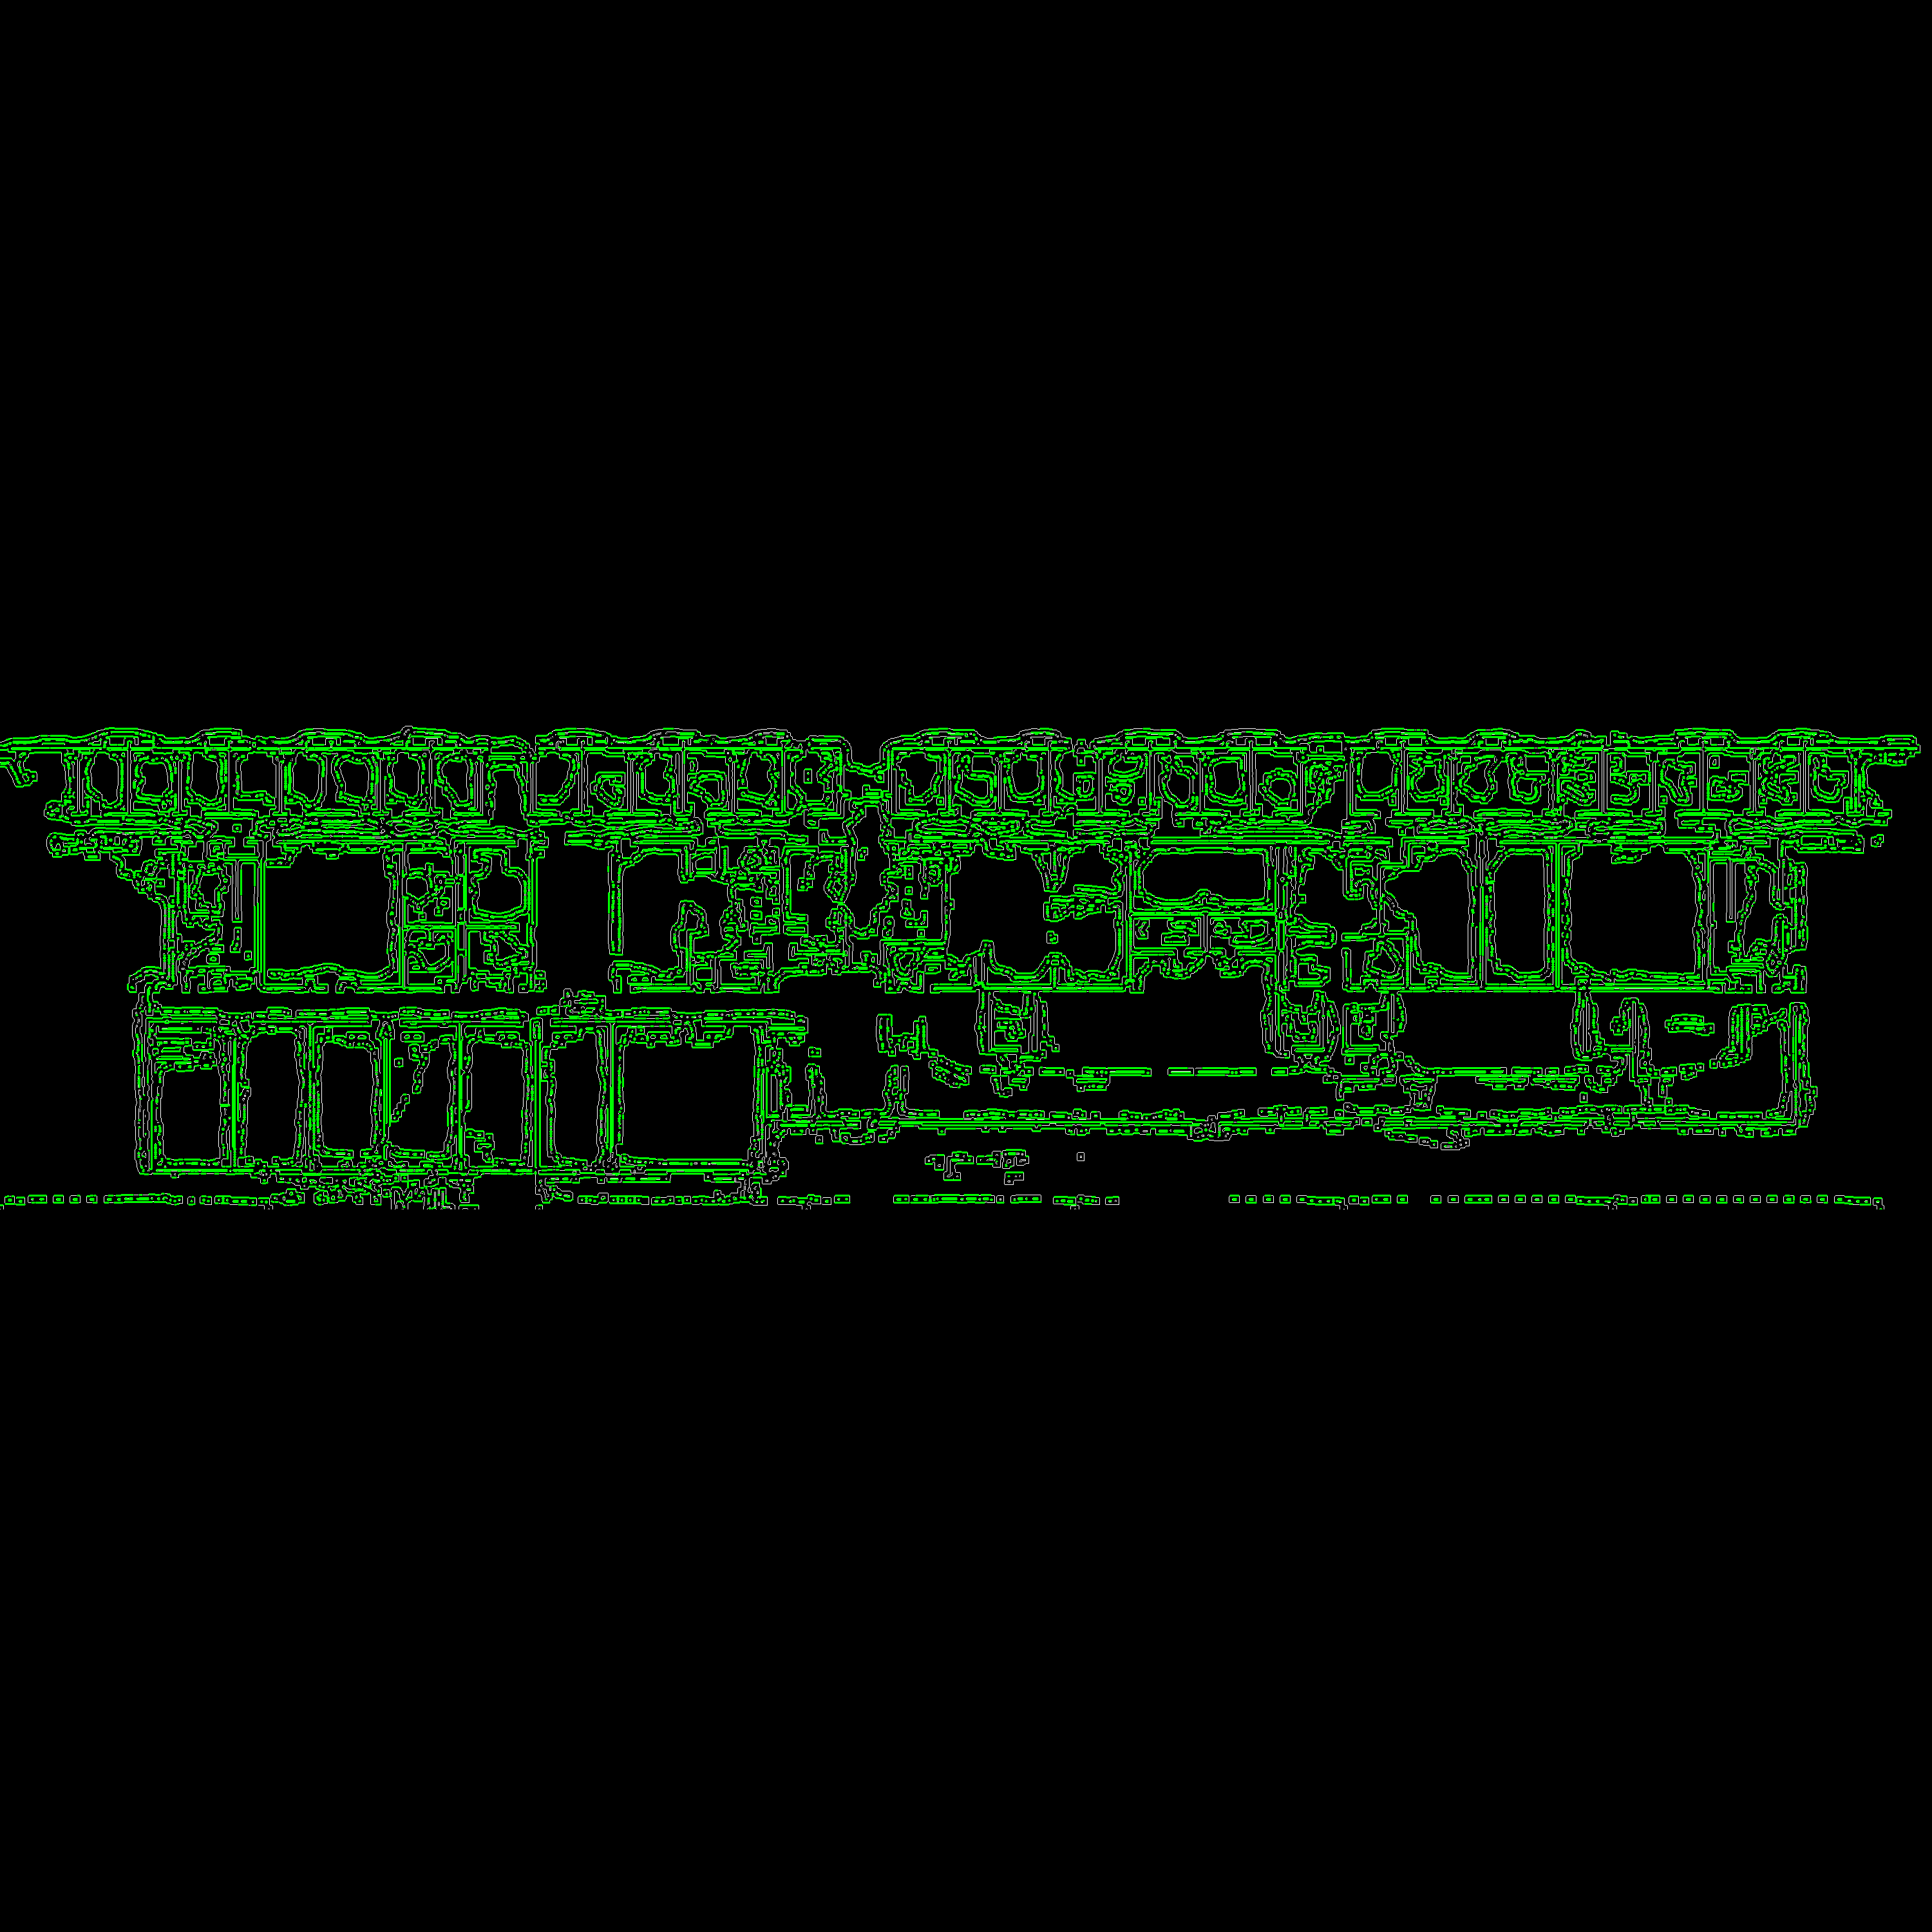

'\n# create verts (points 3d), points to use in mesh creations\nverts = []\n# create faces for each plane, describe order to create mesh points\nfaces = []\n\n# Height of waLL\nwall_height = 1\n\n# Scale pixel value to 3d pos\nscale = 100\n\n# Convert boxes to verts and faces\nverts, faces, wall_amount = transform.create_nx4_verts_and_faces(boxes, wall_height, scale)\n\n# Create top walls verts\nverts = []\nfor box in boxes:\n    verts.extend([transform.scale_point_to_vector(box, scale, 0)])\n\n# create faces\nfaces = []\nfor room in verts:\n    count = 0\n    temp = ()\n    for _ in room:\n        temp = temp + (count,)\n        count += 1\n    faces.append([(temp)])\n'

In [12]:
'''
    Generate wall data file for floorplan
    @Param img_path, path to input file
    @Param info, boolean if data should be printed
    @Return shape
'''
import cv2
from utils.FloorplanToBlenderLib import *
from PIL import Image
import numpy as np

img_path = "Images/reassembled_e2_3x3_2.png"
#img_path = "Images/maps_cropped/E2_2.png"
# Read floorplan image
img = cv2.imread(img_path)
img = maintain_aspect_ratio_resize(img, width=3000)

# Grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create wall image (filter out small objects from image)
wall_img = None
wall_img = detect.wall_filter(gray)

#img = remove_blotches(img)
#display(make_square(Image.fromarray(img)))

# Apply Hough Transform
#hough_img = hough_transform(img)

# Display Hough Transform result
#display(Image.fromarray(hough_img))

display(make_square(Image.fromarray(wall_img)))

display(make_square(Image.fromarray(hough_transform(wall_img))))

'''
# create verts (points 3d), points to use in mesh creations
verts = []
# create faces for each plane, describe order to create mesh points
faces = []

# Height of waLL
wall_height = 1

# Scale pixel value to 3d pos
scale = 100

# Convert boxes to verts and faces
verts, faces, wall_amount = transform.create_nx4_verts_and_faces(boxes, wall_height, scale)

# Create top walls verts
verts = []
for box in boxes:
    verts.extend([transform.scale_point_to_vector(box, scale, 0)])

# create faces
faces = []
for room in verts:
    count = 0
    temp = ()
    for _ in room:
        temp = temp + (count,)
        count += 1
    faces.append([(temp)])
'''

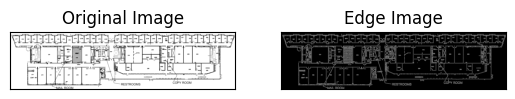

In [30]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("Images/maps_cropped/E2_2.png", cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = maintain_aspect_ratio_resize(img, width=2000)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()